In [ ]:
import pandas as pd
from wordcloud import WordCloud
from matplotlib import pyplot as plt
import re
import nltk

from nltk.corpus import stopwords
import random
import pandas as pd

from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from functools import reduce
from nltk.stem import WordNetLemmatizer
import seaborn as sns

**Data Preparation**

In [ ]:
#pip install stop-words


In [ ]:
nltk.download('words')

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Nourh\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nourh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nourh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nourh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nourh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
# import nltk
# from nltk.corpus import stopwords
# words=stopwords.words('english')


In [ ]:
df=pd.read_csv("html_features.csv")
df

,id,para_content,links,headings,titles,domain_name,domain_occ_count
0,5535,['has selected the best bingo rooms considerin...,"['http://www.10bestonlinecasinos.net/', 'http:...","['10BestBingoRooms.com', 'Deposit £10 and get ...",['10 Best Bingo Rooms :: Only the best online ...,10bestbingorooms.com,72
1,5704,"[""Hi there. I'm Connie Ragen Green, and I've b...","['http://fromideatoebook.com/warranties.htm', ...","['""Can You Really Start Your Online BusinessIn...",['Connie Ragen Green | Starting An Online Busi...,10stepstostartingyouronlinebusiness.com,0
2,5705,"['Accédez à notre', 'E-SHOP', '10, rue Cassett...","['https://www.10surdix.com/contact/', 'https:/...","['Contact', 'Accueil', 'ARCHITECTE D’INTÉRIEUR...","[""[10surdix] Architecte d’intérieur Paris & Sh...",10surdix.com,0
3,6123,['Попробуйте использовать нашу поисковую форму...,['https://116-region.ru/%d0%ba%d0%b0%d1%80%d1%...,"['Ой! Такой страницы похоже не существует.', '...",['Page not found!'],116-region.ru,0
4,6124,['Попробуйте использовать нашу поисковую форму...,['https://116-region.ru/%d0%ba%d0%b0%d1%80%d1%...,"['Ой! Такой страницы похоже не существует.', '...",['Page not found!'],116-region.ru,0
...,...,...,...,...,...,...,...
57277,439417,['This page does not exist. Try searching for ...,"['/collections', '/pages/contact', 'tel:888-20...","[""Oops - We couldn't find that one"", '#drevala...",['Page Not Found'],coin-check.com,0
57278,439497,[],[],['403 Forbidden'],[],coinbene.net,0
57279,439531,['Your browser sent a request that this server...,[],['Bad Request'],['400 Bad Request'],coinchange24.online,0
57280,439532,['Your browser sent a request that this server...,[],['Bad Request'],['400 Bad Request'],coldsnab.ru,0


In [ ]:
df1=pd.read_excel("url_features.xlsx")
df1

,index,id,url,typ,ip_address,count_dot,sign_at,google_search,num_director,num_embed_domain,num_digits,len_url,num_parameter,num_fragments,pref_suf
0,0,5535,http://10bestbingorooms.com,1,0,1,0,1,0,0,2,27,0,0,0
1,1,5704,http://10stepstostartingyouronlinebusiness.com,1,0,1,0,1,0,0,2,46,0,0,0
2,2,5705,http://10surdix.com,1,0,1,0,1,0,0,2,19,0,0,0
3,3,6123,http://116-region.ru/wp-includes/capitalone360...,1,0,1,0,1,4,0,18,80,0,0,1
4,4,6124,http://116-region.ru/wp-includes/capitalone360...,1,0,2,0,1,4,0,18,89,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57277,60247,439417,http://drevalair.com/wp-includes/images,1,0,1,0,1,2,0,0,40,0,0,0
57278,60248,439497,http://drewwestcott.com/zeta/DROPBOXSECURE/sj/...,1,0,2,0,1,5,0,0,63,0,0,0
57279,60249,439531,http://dreyfusashby.com/docs/324/2011/it/,1,0,1,0,1,5,0,7,42,0,0,0
57280,60250,439532,http://dreyfusashby.com/italy/,1,0,1,0,1,2,0,0,31,0,0,0


In [ ]:
labels=df1["typ"]
df["label"]=labels
df1

,index,id,url,typ,ip_address,count_dot,sign_at,google_search,num_director,num_embed_domain,num_digits,len_url,num_parameter,num_fragments,pref_suf
0,0,5535,http://10bestbingorooms.com,1,0,1,0,1,0,0,2,27,0,0,0
1,1,5704,http://10stepstostartingyouronlinebusiness.com,1,0,1,0,1,0,0,2,46,0,0,0
2,2,5705,http://10surdix.com,1,0,1,0,1,0,0,2,19,0,0,0
3,3,6123,http://116-region.ru/wp-includes/capitalone360...,1,0,1,0,1,4,0,18,80,0,0,1
4,4,6124,http://116-region.ru/wp-includes/capitalone360...,1,0,2,0,1,4,0,18,89,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57277,60247,439417,http://drevalair.com/wp-includes/images,1,0,1,0,1,2,0,0,40,0,0,0
57278,60248,439497,http://drewwestcott.com/zeta/DROPBOXSECURE/sj/...,1,0,2,0,1,5,0,0,63,0,0,0
57279,60249,439531,http://dreyfusashby.com/docs/324/2011/it/,1,0,1,0,1,5,0,7,42,0,0,0
57280,60250,439532,http://dreyfusashby.com/italy/,1,0,1,0,1,2,0,0,31,0,0,0


In [ ]:
df["label"].value_counts()

0    31857
1    25425
Name: label, dtype: int64

C:\Users\Nourh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

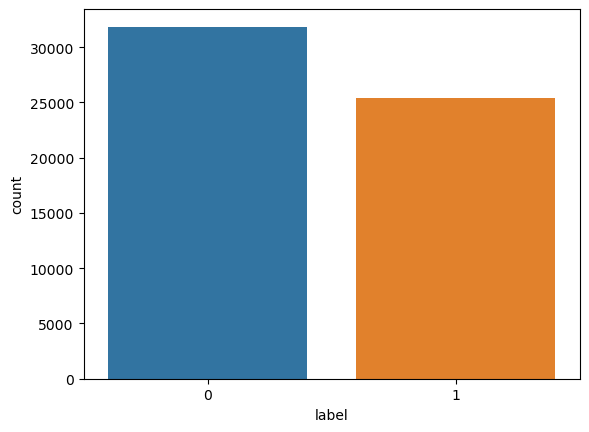

In [ ]:
sns.countplot(df["label"])

In [ ]:
df.drop("id",axis=1,inplace=True)
df.drop("links",axis=1,inplace=True)
df.drop("domain_name",axis=1,inplace=True)
df.drop("domain_occ_count",axis=1,inplace=True)

In [ ]:
heads=[]
for i in df["headings"]:
    sentence = "".join(map(str, i[2:-2].split(", ")))
    heads.append(sentence)
df["clear_headings"]=heads


paragraphs=[]
for i in df["para_content"]:
    sentence = "".join(map(str, i[2:-2].split(", ")))
    paragraphs.append(sentence)
df["clear_paragraphs"]=paragraphs


titles=[]
for i in df["titles"]:
    sentence = "".join(map(str, i[2:-2].split(", ")))
    titles.append(sentence)
df["clear_titles"]=titles


df

,para_content,headings,titles,label,clear_headings,clear_paragraphs,clear_titles
0,['has selected the best bingo rooms considerin...,"['10BestBingoRooms.com', 'Deposit £10 and get ...",['10 Best Bingo Rooms :: Only the best online ...,1,10BestBingoRooms.com''Deposit £10 and get £40!...,has selected the best bingo rooms considering ...,10 Best Bingo Rooms :: Only the best online bi...
1,"[""Hi there. I'm Connie Ragen Green, and I've b...","['""Can You Really Start Your Online BusinessIn...",['Connie Ragen Green | Starting An Online Busi...,1,"""Can You Really Start Your Online BusinessIn J...",Hi there. I'm Connie Ragen Greenand I've been ...,Connie Ragen Green | Starting An Online Business
2,"['Accédez à notre', 'E-SHOP', '10, rue Cassett...","['Contact', 'Accueil', 'ARCHITECTE D’INTÉRIEUR...","[""[10surdix] Architecte d’intérieur Paris & Sh...",1,Contact''Accueil''ARCHITECTE D’INTÉRIEUR PARIS...,Accédez à notre''E-SHOP''10rue Cassette- 75006...,[10surdix] Architecte d’intérieur Paris & Show...
3,['Попробуйте использовать нашу поисковую форму...,"['Ой! Такой страницы похоже не существует.', '...",['Page not found!'],1,Ой! Такой страницы похоже не существует.''Архи...,Попробуйте использовать нашу поисковую форму д...,Page not found!
4,['Попробуйте использовать нашу поисковую форму...,"['Ой! Такой страницы похоже не существует.', '...",['Page not found!'],1,Ой! Такой страницы похоже не существует.''Архи...,Попробуйте использовать нашу поисковую форму д...,Page not found!
...,...,...,...,...,...,...,...
57277,['This page does not exist. Try searching for ...,"[""Oops - We couldn't find that one"", '#drevala...",['Page Not Found'],1,"Oops - We couldn't find that one""'#drevalair''...",This page does not exist. Try searching for wh...,Page Not Found
57278,[],['403 Forbidden'],[],1,403 Forbidden,,
57279,['Your browser sent a request that this server...,['Bad Request'],['400 Bad Request'],1,Bad Request,Your browser sent a request that this server c...,400 Bad Request
57280,['Your browser sent a request that this server...,['Bad Request'],['400 Bad Request'],1,Bad Request,Your browser sent a request that this server c...,400 Bad Request


In [ ]:
df.drop("para_content",axis=1,inplace=True)
df.drop("headings",axis=1,inplace=True)
df.drop("titles",axis=1,inplace=True)
df

,label,clear_headings,clear_paragraphs,clear_titles
0,1,10BestBingoRooms.com''Deposit £10 and get £40!...,has selected the best bingo rooms considering ...,10 Best Bingo Rooms :: Only the best online bi...
1,1,"""Can You Really Start Your Online BusinessIn J...",Hi there. I'm Connie Ragen Greenand I've been ...,Connie Ragen Green | Starting An Online Business
2,1,Contact''Accueil''ARCHITECTE D’INTÉRIEUR PARIS...,Accédez à notre''E-SHOP''10rue Cassette- 75006...,[10surdix] Architecte d’intérieur Paris & Show...
3,1,Ой! Такой страницы похоже не существует.''Архи...,Попробуйте использовать нашу поисковую форму д...,Page not found!
4,1,Ой! Такой страницы похоже не существует.''Архи...,Попробуйте использовать нашу поисковую форму д...,Page not found!
...,...,...,...,...
57277,1,"Oops - We couldn't find that one""'#drevalair''...",This page does not exist. Try searching for wh...,Page Not Found
57278,1,403 Forbidden,,
57279,1,Bad Request,Your browser sent a request that this server c...,400 Bad Request
57280,1,Bad Request,Your browser sent a request that this server c...,400 Bad Request


In [ ]:
def clean_sentences(sentences):
    global new_text
    new_text=[]
    for i in sentences:
        txt=i.replace('\r\n', ' ')
        txt2=txt.replace('\n', ' ')
        txt3=txt2.replace("\'s", "'s")
        txt4=re.sub('[^A-Za-z]+', ' ',txt3)
        txt5=txt4.replace('{html}',"") 
        cleanr = re.compile('<.,*?>')
        cleantext = re.sub(cleanr, '', txt5)
        rem_url=re.sub(r'http\S+', '',cleantext)  
        new_text.append(rem_url)
    return new_text

In [ ]:
from stop_words import get_stop_words
from nltk.corpus import stopwords

stop_words = list(get_stop_words('en'))         #About 900 stopwords
nltk_words = list(stopwords.words('english')) #About 179 stopwords
stop_words.extend(nltk_words)

def remove_stop_words(listofsens):
    filtered_sentences=[]
    for i in listofsens:
        filtered= [word for word in word_tokenize(i) if word not in stop_words]
        filtered_sentences.append(filtered)
    return filtered_sentences


In [ ]:
def remove_nonEnglish(sentences):
    outsentences=[]
    words = set(nltk.corpus.words.words())
    for i in sentences:
        sentence = " ".join(map(str,i))

        out=" ".join(w for w in nltk.wordpunct_tokenize(sentence) if w.lower() in words or not w.isalpha())
        nltk_tokens = nltk.sent_tokenize(out)
        outsentences.append(nltk_tokens)

    return(outsentences)


In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer
lmtzr = WordNetLemmatizer()

def lemitization_and_remove_one_letter(sens):
    newlems=[]
    finallems=[]
    finallems2=[]
    for i in sens:
        if (len(i)>0):
            lemmatized = [lmtzr.lemmatize(word).lower() for word in word_tokenize(i[0])]
            
            finallems.append(set(lemmatized))
        else:
            finallems.append("NOT FOUND")
        #print(finallems)
    for sen in finallems:
        senn=[]
        for word in sen:
            #print(word)
            if (len(word)<2):
                continue
                #sen.remove(word)
            else:
                senn.append(word)
        finallems2.append(senn)
         
    return finallems2
            
            

In [ ]:
sen1=clean_sentences(df["clear_paragraphs"])
sen2=remove_stop_words(sen1)
sen3=remove_nonEnglish(sen2)
sen4=lemitization_and_remove_one_letter(sen3)
df["lem_paragraphs"]=sen4

In [ ]:
sen11=clean_sentences(df["clear_headings"])
sen22=remove_stop_words(sen11)
sen33=remove_nonEnglish(sen22)
sen44=lemitization_and_remove_one_letter(sen33)
df["lem_headings"]=sen44

In [ ]:
sen111=clean_sentences(df["clear_titles"])
sen222=remove_stop_words(sen111)
sen333=remove_nonEnglish(sen222)
sen444=lemitization_and_remove_one_letter(sen333)
df["lem_titles"]=sen444

In [ ]:
df.to_csv("df_nlp.csv")

In [ ]:
df

,label,clear_headings,clear_paragraphs,clear_titles,lem_paragraphs,lem_headings,lem_titles
0,1,10BestBingoRooms.com''Deposit £10 and get £40!...,has selected the best bingo rooms considering ...,10 Best Bingo Rooms :: Only the best online bi...,"[starting, today, enjoy, sign, include, simpli...","[get, tasty, play, bonus, wink, register, hood...","[best, only, bingo]"
1,1,"""Can You Really Start Your Online BusinessIn J...",Hi there. I'm Connie Ragen Greenand I've been ...,Connie Ragen Green | Starting An Online Business,"[report, starting, name, get, process, legal, ...","[report, starting, will, can, special, this, e...","[green, starting, business, an]"
2,1,Contact''Accueil''ARCHITECTE D’INTÉRIEUR PARIS...,Accédez à notre''E-SHOP''10rue Cassette- 75006...,[10surdix] Architecte d’intérieur Paris & Show...,"[showroom, de, site, plan, shop, rue]","[bi, news, contact, de, saint, collaboration, ...","[de, showroom]"
3,1,Ой! Такой страницы похоже не существует.''Архи...,Попробуйте использовать нашу поисковую форму д...,Page not found!,"[designed, copyright, deluxe]",[],"[found, page]"
4,1,Ой! Такой страницы похоже не существует.''Архи...,Попробуйте использовать нашу поисковую форму д...,Page not found!,"[designed, copyright, deluxe]",[],"[found, page]"
...,...,...,...,...,...,...,...
57277,1,"Oops - We couldn't find that one""'#drevalair''...",This page does not exist. Try searching for wh...,Page Not Found,"[try, searching, find, join, like, exist, this...","[connected, we, care, stay, find, one, customer]","[found, not, page]"
57278,1,403 Forbidden,,,[],[forbidden],[]
57279,1,Bad Request,Your browser sent a request that this server c...,400 Bad Request,"[browser, bad, sent, trying, request, your, se...","[bad, request]","[bad, request]"
57280,1,Bad Request,Your browser sent a request that this server c...,400 Bad Request,"[browser, bad, sent, trying, request, your, se...","[bad, request]","[bad, request]"


In [ ]:
df=pd.read_csv("df_nlp.csv")
df.drop("Unnamed: 0",axis=1,inplace=True)
df

,label,clear_headings,clear_paragraphs,clear_titles,lem_paragraphs,lem_headings,lem_titles
0,1,10BestBingoRooms.com''Deposit £10 and get £40!...,has selected the best bingo rooms considering ...,10 Best Bingo Rooms :: Only the best online bi...,"['starting', 'today', 'enjoy', 'sign', 'includ...","['get', 'tasty', 'play', 'bonus', 'wink', 'reg...","['best', 'only', 'bingo']"
1,1,"""Can You Really Start Your Online BusinessIn J...",Hi there. I'm Connie Ragen Greenand I've been ...,Connie Ragen Green | Starting An Online Business,"['report', 'starting', 'name', 'get', 'process...","['report', 'starting', 'will', 'can', 'special...","['green', 'starting', 'business', 'an']"
2,1,Contact''Accueil''ARCHITECTE D’INTÉRIEUR PARIS...,Accédez à notre''E-SHOP''10rue Cassette- 75006...,[10surdix] Architecte d’intérieur Paris & Show...,"['showroom', 'de', 'site', 'plan', 'shop', 'rue']","['bi', 'news', 'contact', 'de', 'saint', 'coll...","['de', 'showroom']"
3,1,Ой! Такой страницы похоже не существует.''Архи...,Попробуйте использовать нашу поисковую форму д...,Page not found!,"['designed', 'copyright', 'deluxe']",[],"['found', 'page']"
4,1,Ой! Такой страницы похоже не существует.''Архи...,Попробуйте использовать нашу поисковую форму д...,Page not found!,"['designed', 'copyright', 'deluxe']",[],"['found', 'page']"
...,...,...,...,...,...,...,...
57277,1,"Oops - We couldn't find that one""'#drevalair''...",This page does not exist. Try searching for wh...,Page Not Found,"['try', 'searching', 'find', 'join', 'like', '...","['connected', 'we', 'care', 'stay', 'find', 'o...","['found', 'not', 'page']"
57278,1,403 Forbidden,NaN,NaN,[],['forbidden'],[]
57279,1,Bad Request,Your browser sent a request that this server c...,400 Bad Request,"['browser', 'bad', 'sent', 'trying', 'request'...","['bad', 'request']","['bad', 'request']"
57280,1,Bad Request,Your browser sent a request that this server c...,400 Bad Request,"['browser', 'bad', 'sent', 'trying', 'request'...","['bad', 'request']","['bad', 'request']"


In [ ]:
df.drop("clear_headings",axis=1,inplace=True)
df.drop("clear_paragraphs",axis=1,inplace=True)
df.drop("clear_titles",axis=1,inplace=True)
df

,label,lem_paragraphs,lem_headings,lem_titles
0,1,"['starting', 'today', 'enjoy', 'sign', 'includ...","['get', 'tasty', 'play', 'bonus', 'wink', 'reg...","['best', 'only', 'bingo']"
1,1,"['report', 'starting', 'name', 'get', 'process...","['report', 'starting', 'will', 'can', 'special...","['green', 'starting', 'business', 'an']"
2,1,"['showroom', 'de', 'site', 'plan', 'shop', 'rue']","['bi', 'news', 'contact', 'de', 'saint', 'coll...","['de', 'showroom']"
3,1,"['designed', 'copyright', 'deluxe']",[],"['found', 'page']"
4,1,"['designed', 'copyright', 'deluxe']",[],"['found', 'page']"
...,...,...,...,...
57277,1,"['try', 'searching', 'find', 'join', 'like', '...","['connected', 'we', 'care', 'stay', 'find', 'o...","['found', 'not', 'page']"
57278,1,[],['forbidden'],[]
57279,1,"['browser', 'bad', 'sent', 'trying', 'request'...","['bad', 'request']","['bad', 'request']"
57280,1,"['browser', 'bad', 'sent', 'trying', 'request'...","['bad', 'request']","['bad', 'request']"


In [ ]:
from ast import literal_eval
df['lem_paragraphs'] = df['lem_paragraphs'].apply(literal_eval)
df['lem_headings'] = df['lem_headings'].apply(literal_eval)
df['lem_titles'] = df['lem_titles'].apply(literal_eval)

In [ ]:
df["lem_titles"][0]

['best', 'only', 'bingo']

In [ ]:
df.isnull().sum()


label             0
lem_paragraphs    0
lem_headings      0
lem_titles        0
dtype: int64

In [ ]:
# df=df[df['lem_paragraphs'].map(lambda d: len(d)) > 0]
# df

In [ ]:
df["lem_paragraphs"].apply(lambda x:1 if len(x) ==0 else 0).sum()


18759

In [ ]:
df["lem_headings"].apply(lambda x:  1 if len(x) == 0 else 0).sum()


17512

In [ ]:
df["lem_titles"].apply(lambda x:  1 if len(x) == 0 else 0).sum()


14697

remove rows with empty content in paragraphs column

In [ ]:
df=df[df['lem_paragraphs'].map(lambda d: len(d)) > 0]
df

,label,lem_paragraphs,lem_headings,lem_titles
0,1,"[starting, today, enjoy, sign, include, simpli...","[get, tasty, play, bonus, wink, register, hood...","[best, only, bingo]"
1,1,"[report, starting, name, get, process, legal, ...","[report, starting, will, can, special, this, e...","[green, starting, business, an]"
2,1,"[showroom, de, site, plan, shop, rue]","[bi, news, contact, de, saint, collaboration, ...","[de, showroom]"
3,1,"[designed, copyright, deluxe]",[],"[found, page]"
4,1,"[designed, copyright, deluxe]",[],"[found, page]"
...,...,...,...,...
57275,1,"[formal, semi, particular, collar, symbolism, ...","[just, hand, not, handmade, uniform, untipped,...","[like, dress]"
57276,1,"[dressy, para, de, em, site, jeans, copyright,...",[],"[dressy, size, home, plus]"
57277,1,"[try, searching, find, join, like, exist, this...","[connected, we, care, stay, find, one, customer]","[found, not, page]"
57279,1,"[browser, bad, sent, trying, request, your, se...","[bad, request]","[bad, request]"


In [ ]:
# df.lem_paragraphs.apply(lambda x: ' '.join([i for i in x]))

In [ ]:
df['lem_paragraphs_text'] = df.lem_paragraphs.apply(lambda x: ' '.join([i for i in x]))


C:\Users\Nourh\AppData\Local\Temp\ipykernel_6004\2526651434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lem_paragraphs_text'] = df.lem_paragraphs.apply(lambda x: ' '.join([i for i in x]))


In [ ]:
df

,label,lem_paragraphs,lem_headings,lem_titles,lem_paragraphs_text
0,1,"[starting, today, enjoy, sign, include, simpli...","[get, tasty, play, bonus, wink, register, hood...","[best, only, bingo]",starting today enjoy sign include simplified p...
1,1,"[report, starting, name, get, process, legal, ...","[report, starting, will, can, special, this, e...","[green, starting, business, an]",report starting name get process legal earning...
2,1,"[showroom, de, site, plan, shop, rue]","[bi, news, contact, de, saint, collaboration, ...","[de, showroom]",showroom de site plan shop rue
3,1,"[designed, copyright, deluxe]",[],"[found, page]",designed copyright deluxe
4,1,"[designed, copyright, deluxe]",[],"[found, page]",designed copyright deluxe
...,...,...,...,...,...
57275,1,"[formal, semi, particular, collar, symbolism, ...","[just, hand, not, handmade, uniform, untipped,...","[like, dress]",formal semi particular collar symbolism untipp...
57276,1,"[dressy, para, de, em, site, jeans, copyright,...",[],"[dressy, size, home, plus]",dressy para de em site jeans copyright cal
57277,1,"[try, searching, find, join, like, exist, this...","[connected, we, care, stay, find, one, customer]","[found, not, page]",try searching find join like exist this copyri...
57279,1,"[browser, bad, sent, trying, request, your, se...","[bad, request]","[bad, request]",browser bad sent trying request your server us...


C:\Users\Nourh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

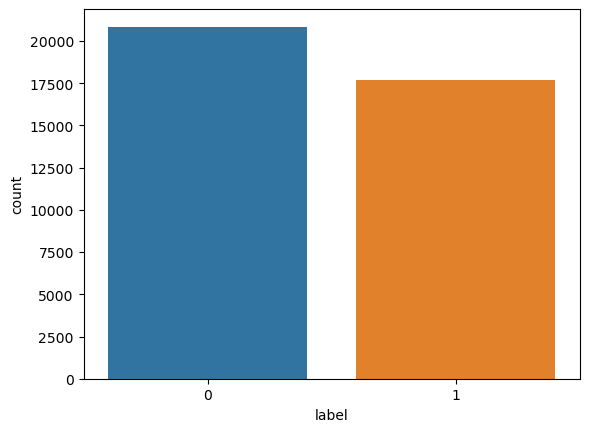

In [ ]:
sns.countplot(df["label"])

In [ ]:
a=df["lem_paragraphs"][3]
sentence = " ".join(map(str, a))
sentence

'designed copyright deluxe'

In [ ]:
paragraphs=[]
for i in df["lem_paragraphs"]:
    sentence = " ".join(map(str, i))
    paragraphs.append(sentence)
df["text_paragraphs"]=paragraphs



heads=[]
for i in df["lem_headings"]:
    sentence = " ".join(map(str, i))
    heads.append(sentence)
df["text_headings"]=heads


titles=[]
for i in df["lem_titles"]:
    sentence = " ".join(map(str, i))
    titles.append(sentence)
df["text_titles"]=titles


C:\Users\Nourh\AppData\Local\Temp\ipykernel_6004\2454528503.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_paragraphs"]=paragraphs
C:\Users\Nourh\AppData\Local\Temp\ipykernel_6004\2454528503.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text_headings"]=heads
C:\Users\Nourh\AppData\Local\Temp\ipykernel_6004\2454528503.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [ ]:
df

,label,lem_paragraphs,lem_headings,lem_titles,lem_paragraphs_text,text_paragraphs,text_headings,text_titles
0,1,"[starting, today, enjoy, sign, include, simpli...","[get, tasty, play, bonus, wink, register, hood...","[best, only, bingo]",starting today enjoy sign include simplified p...,starting today enjoy sign include simplified p...,get tasty play bonus wink register hood more w...,best only bingo
1,1,"[report, starting, name, get, process, legal, ...","[report, starting, will, can, special, this, e...","[green, starting, business, an]",report starting name get process legal earning...,report starting name get process legal earning...,report starting will can special this exactly ...,green starting business an
2,1,"[showroom, de, site, plan, shop, rue]","[bi, news, contact, de, saint, collaboration, ...","[de, showroom]",showroom de site plan shop rue,showroom de site plan shop rue,bi news contact de saint collaboration home,de showroom
3,1,"[designed, copyright, deluxe]",[],"[found, page]",designed copyright deluxe,designed copyright deluxe,,found page
4,1,"[designed, copyright, deluxe]",[],"[found, page]",designed copyright deluxe,designed copyright deluxe,,found page
...,...,...,...,...,...,...,...,...
57275,1,"[formal, semi, particular, collar, symbolism, ...","[just, hand, not, handmade, uniform, untipped,...","[like, dress]",formal semi particular collar symbolism untipp...,formal semi particular collar symbolism untipp...,just hand not handmade uniform untipped busine...,like dress
57276,1,"[dressy, para, de, em, site, jeans, copyright,...",[],"[dressy, size, home, plus]",dressy para de em site jeans copyright cal,dressy para de em site jeans copyright cal,,dressy size home plus
57277,1,"[try, searching, find, join, like, exist, this...","[connected, we, care, stay, find, one, customer]","[found, not, page]",try searching find join like exist this copyri...,try searching find join like exist this copyri...,connected we care stay find one customer,found not page
57279,1,"[browser, bad, sent, trying, request, your, se...","[bad, request]","[bad, request]",browser bad sent trying request your server us...,browser bad sent trying request your server us...,bad request,bad request


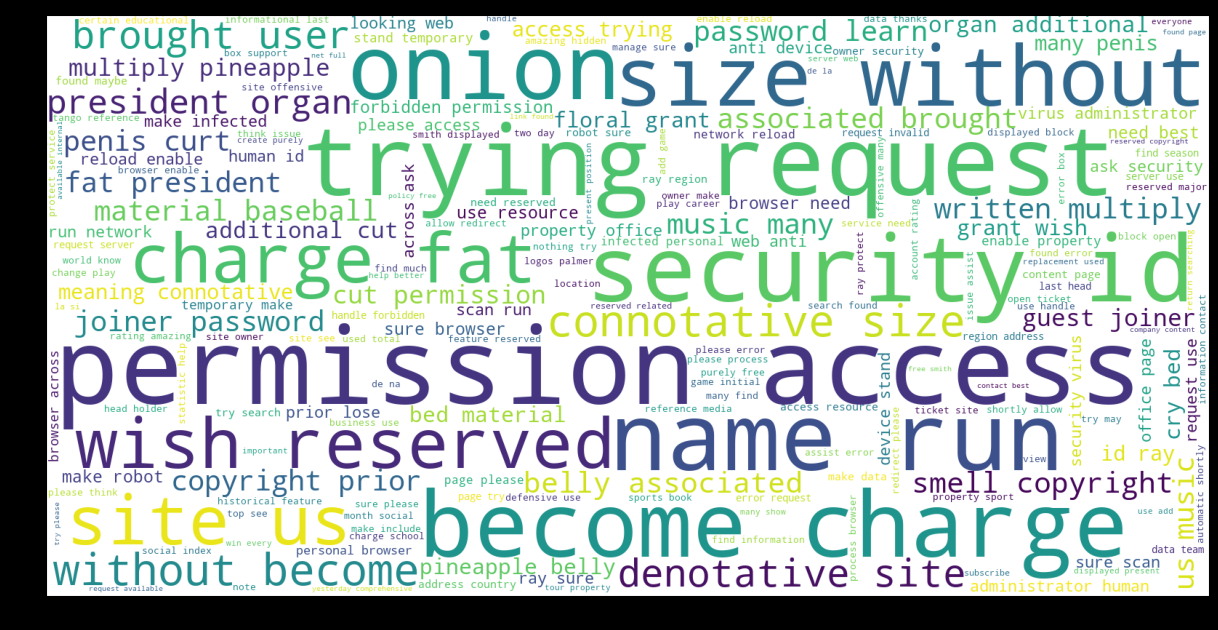

In [ ]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df['text_paragraphs'].tolist()))
plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)

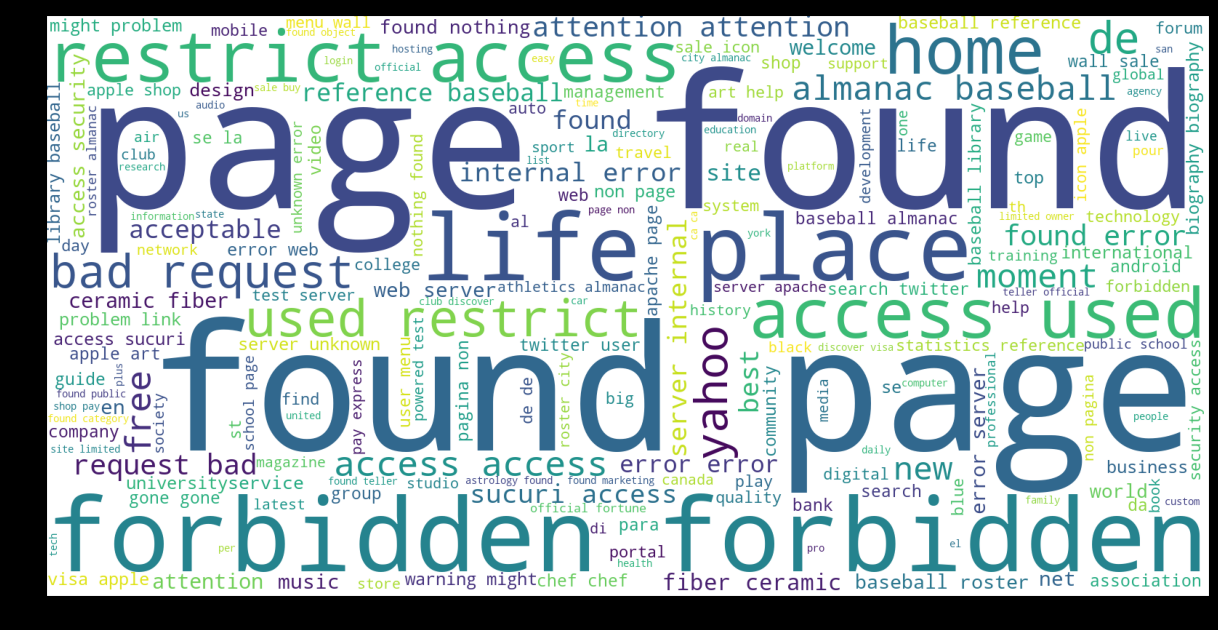

In [ ]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df['text_titles'].tolist()))
plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)

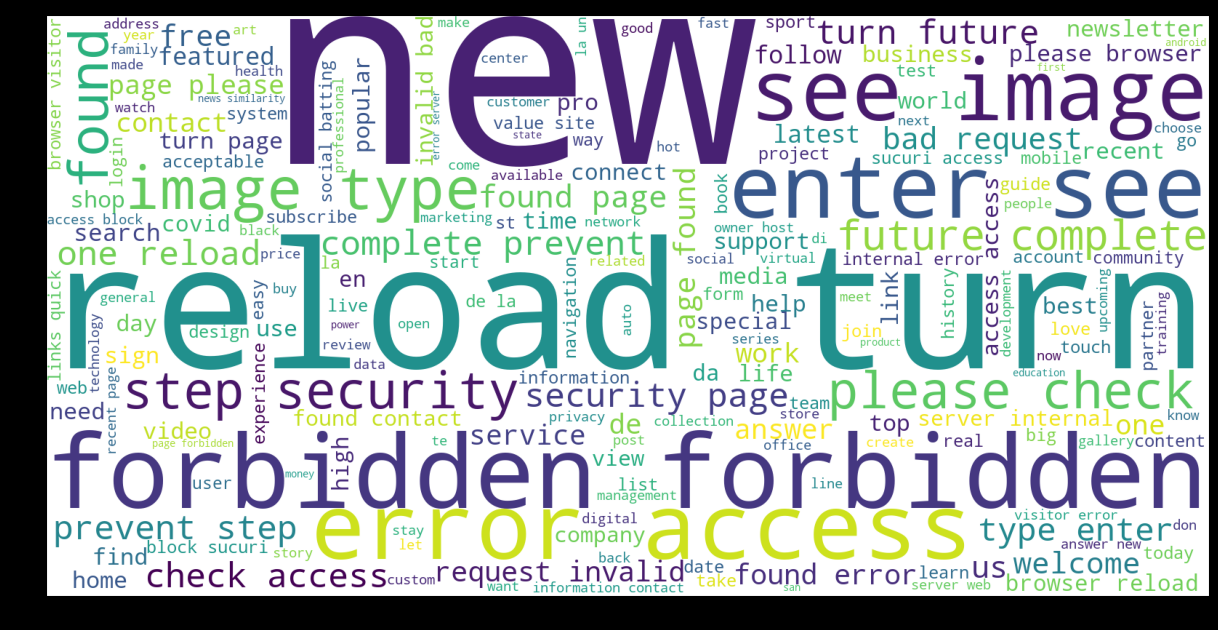

In [ ]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join((df['text_headings']).tolist()))
plt.figure( figsize=(15,8), facecolor='k')
plt.imshow(wordcloud)

In [ ]:
df

,label,lem_paragraphs,lem_headings,lem_titles,lem_paragraphs_text,text_paragraphs,text_headings,text_titles
0,1,"[starting, today, enjoy, sign, include, simpli...","[get, tasty, play, bonus, wink, register, hood...","[best, only, bingo]",starting today enjoy sign include simplified p...,starting today enjoy sign include simplified p...,get tasty play bonus wink register hood more w...,best only bingo
1,1,"[report, starting, name, get, process, legal, ...","[report, starting, will, can, special, this, e...","[green, starting, business, an]",report starting name get process legal earning...,report starting name get process legal earning...,report starting will can special this exactly ...,green starting business an
2,1,"[showroom, de, site, plan, shop, rue]","[bi, news, contact, de, saint, collaboration, ...","[de, showroom]",showroom de site plan shop rue,showroom de site plan shop rue,bi news contact de saint collaboration home,de showroom
3,1,"[designed, copyright, deluxe]",[],"[found, page]",designed copyright deluxe,designed copyright deluxe,,found page
4,1,"[designed, copyright, deluxe]",[],"[found, page]",designed copyright deluxe,designed copyright deluxe,,found page
...,...,...,...,...,...,...,...,...
57275,1,"[formal, semi, particular, collar, symbolism, ...","[just, hand, not, handmade, uniform, untipped,...","[like, dress]",formal semi particular collar symbolism untipp...,formal semi particular collar symbolism untipp...,just hand not handmade uniform untipped busine...,like dress
57276,1,"[dressy, para, de, em, site, jeans, copyright,...",[],"[dressy, size, home, plus]",dressy para de em site jeans copyright cal,dressy para de em site jeans copyright cal,,dressy size home plus
57277,1,"[try, searching, find, join, like, exist, this...","[connected, we, care, stay, find, one, customer]","[found, not, page]",try searching find join like exist this copyri...,try searching find join like exist this copyri...,connected we care stay find one customer,found not page
57279,1,"[browser, bad, sent, trying, request, your, se...","[bad, request]","[bad, request]",browser bad sent trying request your server us...,browser bad sent trying request your server us...,bad request,bad request


In [ ]:
from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(df['text_paragraphs'])

y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
from sklearn import feature_extraction, model_selection, naive_bayes, pipeline, manifold, preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
#import and create object from CountVectorizer


## Baseline Model 

accuracy_score 75.72899541403478
Accuracy  75.72899541403478
              precision    recall  f1-score   support

           0       0.87      0.65      0.74      6255
           1       0.68      0.88      0.77      5302

    accuracy                           0.76     11557
   macro avg       0.77      0.77      0.76     11557
weighted avg       0.78      0.76      0.76     11557



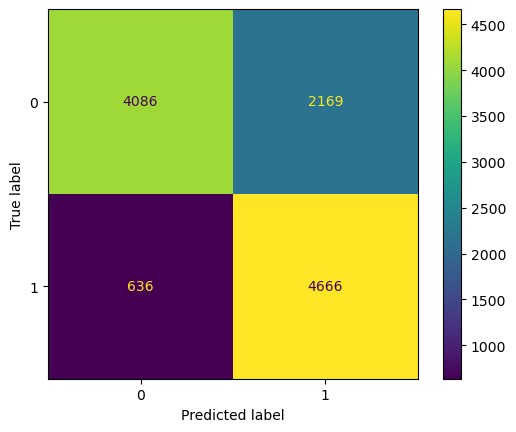

In [ ]:
model1 = MultinomialNB() 
model1.fit(X_train,y_train) 
y_pred = model1.predict(X_test)
acc=model1.score(X_test,y_test)
print("accuracy_score",acc*100)
print("Accuracy ",accuracy_score(y_test, y_pred)*100)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model1.classes_)
disp.plot()
plt.show()

## Apply Grid search and CV =10 to the following models: SGD, LR, RF

In [ ]:
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from mlxtend.feature_selection import ColumnSelector
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from pprint import pprint
from time import time
import logging
from sklearn.model_selection import cross_val_score 


**1- SGD- champion**

In [ ]:


X = df['text_paragraphs']

y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf", SGDClassifier()),
    ]
)
parameters = {
    "vect__max_df": (0.5, 0.75, 1.0),
    # 'vect__max_features': (None, 5000, 10000, 50000),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    "clf__max_iter": (20,),
    "clf__alpha": (0.00001, 0.000001),
    "clf__penalty": ("l2", "elasticnet"),
    # 'clf__max_iter': (10, 50, 80),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(X_train,y_train)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))




Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (20,),
 'clf__penalty': ('l2', 'elasticnet'),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
done in 91.279s

Best score: 0.853
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'elasticnet'
	vect__max_df: 0.5
	vect__ngram_range: (1, 2)


C:\Users\Nourh\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:
from sklearn.model_selection import cross_val_score 


X = df['text_paragraphs']

y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)



pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ("tfidf", TfidfTransformer()),
        ("clf", SGDClassifier()),
    ]
)
parameters = {
    "vect__max_df": (0.5, 0.75, 1.0),
    # 'vect__max_features': (None, 5000, 10000, 50000),
    "vect__ngram_range": ((1, 1), (1, 2)),  # unigrams or bigrams
    # 'tfidf__use_idf': (True, False),
    # 'tfidf__norm': ('l1', 'l2'),
    "clf__max_iter": (20,),
    "clf__alpha": (0.00001, 0.000001),
    "clf__penalty": ("l2", "elasticnet"),
    # 'clf__max_iter': (10, 50, 80),
}

grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=1)

print("Performing grid search...")
print("pipeline:", [name for name, _ in pipeline.steps])
print("parameters:")
pprint(parameters)
t0 = time()
grid_search.fit(X_train,y_train)
print("done in %0.3fs" % (time() - t0))
print()

print("Best score: %0.3f" % grid_search.best_score_)
print("Best parameters set:")
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))




Performing grid search...
pipeline: ['vect', 'tfidf', 'clf']
parameters:
{'clf__alpha': (1e-05, 1e-06),
 'clf__max_iter': (20,),
 'clf__penalty': ('l2', 'elasticnet'),
 'vect__max_df': (0.5, 0.75, 1.0),
 'vect__ngram_range': ((1, 1), (1, 2))}
Fitting 5 folds for each of 24 candidates, totalling 120 fits
done in 166.182s

Best score: 0.854
Best parameters set:
	clf__alpha: 1e-05
	clf__max_iter: 20
	clf__penalty: 'elasticnet'
	vect__max_df: 0.75
	vect__ngram_range: (1, 2)


C:\Users\Nourh\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [ ]:

#ngram_range=(2,3) 
text_clf = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier()),
])
#text_clf.fit(X_train, y_train)

parameters={'clf__alpha': (1e-05),
 'clf__max_iter': (20),
 'clf__penalty': ( 'elasticnet'),
 'vect__max_df': (0.75),
 'vect__ngram_range': ((1, 2))}
cross_val_score(text_clf, X_train, y_train , cv=10)



array([0.84760845, 0.84167594, 0.83129403, 0.82944012, 0.83277716,
       0.84427141, 0.83382789, 0.84272997, 0.8264095 , 0.85274481])

In [ ]:
text_clf = Pipeline([
   
    #('vect', CountVectorizer(ngram_range=(2,2))),
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', SGDClassifier(alpha= (1e-05),
 max_iter= (20),
 penalty=('elasticnet'),
#  max_df= (0.5),ngram_range= ((1, 2))
 ))
])

#Training
text_clf.fit(X_train, y_train)


C:\Users\Nourh\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:696: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=1e-05, max_iter=20,
                               penalty='elasticnet'))])

In [ ]:
import numpy as np 

predicted = text_clf.predict(X_test)
#predicted = text_clf.SCOR(X_test)
np.mean(predicted == y_test)



0.8415678809379596

error analysis

In [ ]:
FP=y_test!=predicted
FP

56200    False
46486    False
47558    False
43175    False
14431    False
         ...  
25709    False
45253    False
29060    False
54246    False
24439    False
Name: label, Length: 11557, dtype: bool

In [ ]:

#get the wrong predictions 
wrong1=X_test[FP]
wrong1

35993    drubbing play greater beck conference along re...
40649    copyright may reply go bearing contact corp al...
33817                                para per de driver el
54520    new privacy reserved this page try return sear...
39115                       permission access resource you
                               ...                        
2755     low service monthly time based advice excellen...
20694    manage sure please think issue assist error bo...
54837    building conference shooting industrial unders...
38692                       permission access resource you
25003    hist inform sector longa em de na web gest da ...
Name: text_paragraphs, Length: 1831, dtype: object

In [ ]:

wrong_preds=pd.DataFrame(wrong1)
wrong_preds

,text_paragraphs
35993,drubbing play greater beck conference along re...
40649,copyright may reply go bearing contact corp al...
33817,para per de driver el
54520,new privacy reserved this page try return sear...
39115,permission access resource you
...,...
2755,low service monthly time based advice excellen...
20694,manage sure please think issue assist error bo...
54837,building conference shooting industrial unders...
38692,permission access resource you


In [ ]:
from sklearn import metrics

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, \
f1_score, classification_report,ConfusionMatrixDisplay

print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      6255
           1       0.82      0.83      0.83      5302

    accuracy                           0.84     11557
   macro avg       0.84      0.84      0.84     11557
weighted avg       0.84      0.84      0.84     11557



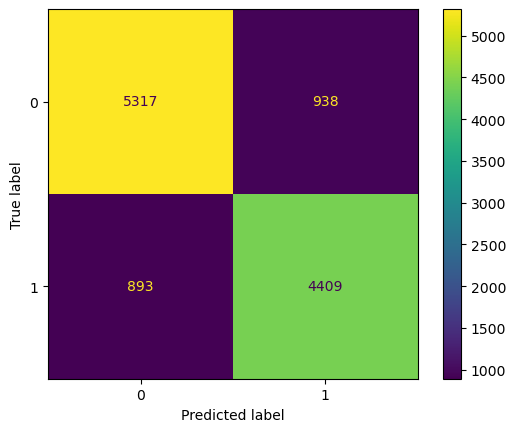

In [ ]:

cm = confusion_matrix(y_test, predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

**LR, RF**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm


X = df['text_paragraphs']

y = df['label']
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
#Now let us contruct some pipelines of our choice.

pipe_lr = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(random_state=42))])


pipe_rf = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
            ('clf', RandomForestClassifier(random_state=42))])


pipe_svm = Pipeline([('vect', CountVectorizer()),
                   ('tfidf', TfidfTransformer()),
            ('clf', svm.SVC(random_state=42))])


In [ ]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import sklearn.metrics as metrics

param_range = [9, 10]
param_range_fl = [1.0, 0.5]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
        'clf__C': param_range_fl,
        'clf__solver': ['liblinear']}] 


grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
        'clf__max_depth': param_range,
        'clf__min_samples_split': param_range[1:]}]


# Construct grid searches
jobs = -1

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='accuracy',
            cv=10) 



RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='accuracy',
            cv=10, 
            n_jobs=jobs)





# List of pipelines for iterating through each of them
grids = [LR,RF]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
        1: 'Random Forest'}

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
    print('\nEstimator: %s' % grid_dict[idx])
    gs.fit(X_train, y_train)
    print('Best params are : %s' % gs.best_params_)
    # Best training data accuracy
    print('Best training accuracy: %.3f' % gs.best_score_)
    # Predict on test data with best params
    y_pred = gs.predict(X_test)
    # Test data accuracy of model with best params
    print('Test set F1 score for best params: %.3f ' % f1_score(y_test, y_pred))
    # Track best (highest test accuracy) model
    print('Test set recall score for best params: %.3f ' % recall_score(y_test, y_pred))
    print(metrics.classification_report(y_test, y_pred))
    print(metrics.confusion_matrix(y_test, y_pred))

    if f1_score(y_test, y_pred) > best_acc:
        best_acc = f1_score(y_test, y_pred)
        #recall=recall_score(y_test, y_pred, average=None)
        best_gs = gs
        best_clf = idx
print('\nClassifier with best test set f1_score: %s' % grid_dict[best_clf])



Performing model optimizations...

Estimator: Logistic Regression
Best params are : {'clf__C': 1.0, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best training accuracy: 0.838
Test set F1 score for best params: 0.824 
Test set recall score for best params: 0.805 
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      6255
           1       0.84      0.80      0.82      5302

    accuracy                           0.84     11557
   macro avg       0.84      0.84      0.84     11557
weighted avg       0.84      0.84      0.84     11557

[[5472  783]
 [1034 4268]]

Estimator: Random Forest
Best params are : {'clf__criterion': 'gini', 'clf__max_depth': 10, 'clf__min_samples_split': 10}
Best training accuracy: 0.777
Test set F1 score for best params: 0.734 
Test set recall score for best params: 0.660 
              precision    recall  f1-score   support

           0       0.75      0.88      0.81      6255
           1       0.83     

## LSTM with GloVe

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn import preprocessing
from tqdm import tqdm
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
# from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.layers import GlobalMaxPooling1D, Conv1D, MaxPooling1D, Flatten, Bidirectional, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [ ]:
X = df['lem_paragraphs_text']

y = df['label']
xtrain, xtest, ytrain, ytest = train_test_split(X,y, 
 stratify=y, 
 random_state=42, 
 test_size=0.2, shuffle=True)

In [ ]:
embeddings_index = {}
f = open("glove.6B.100d.txt.word2vec",encoding="utf8")
for line in tqdm(f):
 values = line.split()
 word = values[0]
 coefs = np.asarray(values[1:], dtype="float32")
 embeddings_index[word] = coefs
f.close()
print("Found %s word vectors." % len(embeddings_index))

400001it [00:16, 24437.98it/s]

Found 400001 word vectors.


In [ ]:
from keras.preprocessing import sequence


In [ ]:
sens=df['lem_paragraphs']
flat_list = [item for sublist in sens for item in sublist]


In [ ]:
len(set(flat_list))

32276

In [ ]:
from keras.utils import pad_sequences

VOCABULARY_SIZE = 32276
MAX_LENGTH = 200
tokenizer = Tokenizer(num_words=VOCABULARY_SIZE)
tokenizer.fit_on_texts(list(xtrain) + list(xtest))
xtrain_sequence = tokenizer.texts_to_sequences(xtrain)
xtest_sequence = tokenizer.texts_to_sequences(xtest)
xtrain_padding = pad_sequences(xtrain_sequence, maxlen=MAX_LENGTH)
xtest_padding = pad_sequences(xtest_sequence, maxlen=MAX_LENGTH)
word_index = tokenizer.word_index

In [ ]:
embedding_matrix = np.zeros((len(word_index) + 1, 100))
for word, i in tqdm(word_index.items()):
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    
    embedding_matrix[i] = embedding_vector

100%|████████████████████████████████████████████████████████████████████████| 32276/32276 [00:00<00:00, 408414.00it/s]


In [ ]:
# from keras.layers.embeddings import Embedding
from keras.layers import LSTM, GRU

model = Sequential()
model.add(tf.keras.layers.Embedding(len(word_index) + 1,
 100,
 weights=[embedding_matrix],
 input_length=MAX_LENGTH,
 trainable=False))
model.add(SpatialDropout1D(0.3))
model.add(Bidirectional(LSTM(100, recurrent_dropout=0.3)))
model.add(Dense(60, activation="relu"))
model.add(Dense(30, activation="relu"))
model.add(Dense(2))
model.add(Activation("softmax"))
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
np.unique(df['lem_paragraphs'].values)

array([list(['aa']), list(['aa', 'reference']), list(['abandoned']), ...,
       list(['zoom', 'international', 'de', 'la', 'mero', 'un', 'el']),
       list(['zoom', 'mac', 'sip', 'enjoy', 'it', 'and', 'android']),
       list(['zoom', 'world', 'follow', 'covid', 'mail', 'rub'])],
      dtype=object)

In [ ]:
ytrain_encode = np_utils.to_categorical(ytrain)
ytest_encode = np_utils.to_categorical(ytest)

In [ ]:
history = model.fit(xtrain_padding, y=ytrain_encode, batch_size=64, epochs=15, verbose=1, validation_split=0.2)

Epoch 1/15
386/386 [==============================] - 500s 1s/step - loss: 0.5114 - accuracy: 0.7419 - val_loss: 0.4706 - val_accuracy: 0.7836
Epoch 2/15
386/386 [==============================] - 489s 1s/step - loss: 0.4576 - accuracy: 0.7800 - val_loss: 0.4480 - val_accuracy: 0.7876
Epoch 3/15
386/386 [==============================] - 489s 1s/step - loss: 0.4308 - accuracy: 0.7959 - val_loss: 0.4290 - val_accuracy: 0.7985
Epoch 4/15
386/386 [==============================] - 465s 1s/step - loss: 0.4130 - accuracy: 0.8079 - val_loss: 0.4160 - val_accuracy: 0.8030
Epoch 5/15
386/386 [==============================] - 468s 1s/step - loss: 0.3993 - accuracy: 0.8146 - val_loss: 0.4021 - val_accuracy: 0.8121
Epoch 6/15
386/386 [==============================] - 491s 1s/step - loss: 0.3872 - accuracy: 0.8242 - val_loss: 0.3998 - val_accuracy: 0.8181
Epoch 7/15
386/386 [==============================] - 495s 1s/step - loss: 0.3764 - accuracy: 0.8277 - val_loss: 0.3950 - val_accuracy: 0.8196

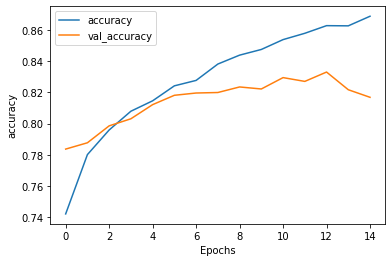

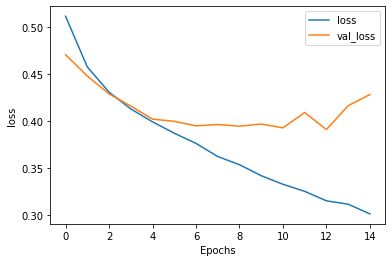

In [ ]:
def graph_plots(history, string):
 plt.plot(history.history[string])
 plt.plot(history.history["val_"+string])
 plt.xlabel("Epochs")
 plt.ylabel(string)
 plt.legend([string, "val_"+string])
 plt.show()
 
graph_plots(history, "accuracy")
graph_plots(history, "loss")

In [ ]:
# Generate generalization metrics
score = model.evaluate(xtest_padding, ytest_encode, verbose=0)
print(f'Test loss: {score[0]} / Test accuracy: {score[1]}')

Test loss: 0.4265827238559723 / Test accuracy: 0.8214146494865417


In [ ]:
y_pred = model.predict(xtest_padding)

241/241 [==============================] - 36s 147ms/step


In [ ]:
y_pred = y_pred > 0.5 

In [ ]:
y_pred

array([[ True, False],
       [ True, False],
       [False,  True],
       ...,
       [False,  True],
       [ True, False],
       [False,  True]])

In [ ]:
yytest_encode=(ytest_encode == 1.) 
yytest_encode

array([[ True, False],
       [ True, False],
       [ True, False],
       ...,
       [False,  True],
       [ True, False],
       [False,  True]])

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import f1_score

print(metrics.classification_report(yytest_encode, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.81      0.83      4170
           1       0.79      0.84      0.81      3535

   micro avg       0.82      0.82      0.82      7705
   macro avg       0.82      0.82      0.82      7705
weighted avg       0.82      0.82      0.82      7705
 samples avg       0.82      0.82      0.82      7705

